#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=T,alpha=0.8)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y'',kind='scatter'), 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram : plt.hist(x, bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,t,color='')
- scatter plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.joinplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [2]:
col=['Date','Close','Start','High','Low','Volume']
df.drop('전일종가',axis=1,inplace=True)
df.columns=col
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# Date를 datetime 으로 변경한 후 인덱스로 세팅
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


In [6]:
# 선그래프
df1 = df[['Close','Start','High','Low']]
df1 = df1.sort_index()

<AxesSubplot:>

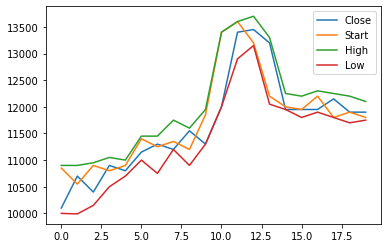

In [7]:
df1.plot()

<AxesSubplot:xlabel='Date'>

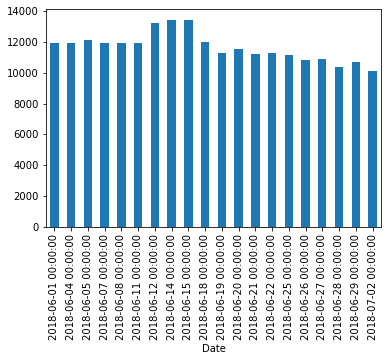

In [5]:
df2=df1.sort_index()
df2.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

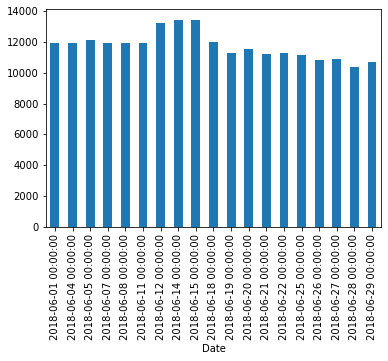

In [11]:
# Q. 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.
df2.loc[df2.index<'2018-07-01'].Close.plot(kind='bar')

df2.loc['2018-06'].Close.plot(kind='bar')


In [13]:
df2.head()
df2.loc['2018-07']

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000


<AxesSubplot:ylabel='Frequency'>

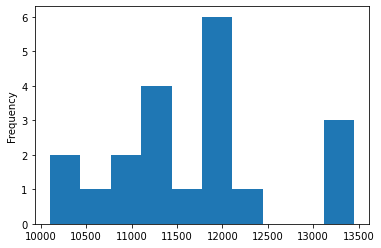

In [14]:
df2.Close.plot(kind='hist')

In [16]:
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

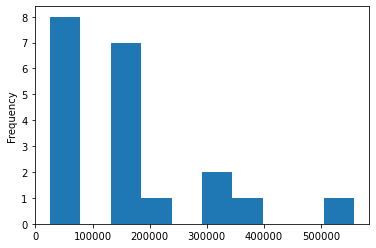

In [17]:
df.Volume.plot(kind='hist')

In [18]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

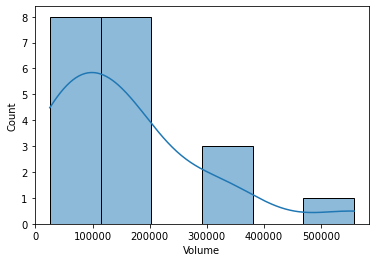

In [19]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

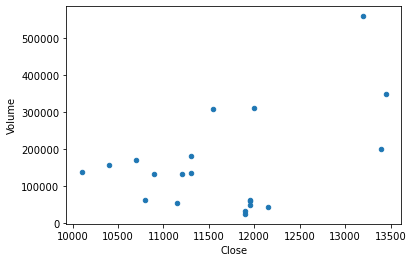

In [20]:
# 산점도 
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

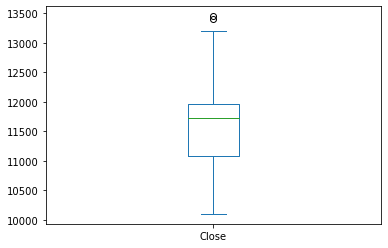

In [21]:
# Box Plot
df.Close.plot(kind='box')

#### Box plot 의미 해석
- IQR(Inter Quartile Range) : 제3사분위수(Q3) - 제1사분위수(Q1)
- lower whisker : Q1 - (1.5 * IQR) 이내인 값 중에서 최솟값
- upper whisker : Q3 + (1.5 * IQR) 이내인 값 중에서 최댓값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [22]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [36]:
# Close 칼럼의 이상치
df3=df.sort_values(by=['Close'],ascending=False)
Q1 = df3.Close.quantile(.25)
Q3 = df3.Close.describe()['75%']
IQR = Q3 - Q1
print(Q3+1.5*IQR)
print(df3.Close)
df3.Close.loc[df3.Close > Q3 +1.5*IQR]

13275.0
12    13450
11    13400
13    13200
17    12150
10    12000
16    11950
15    11950
14    11950
18    11900
19    11900
8     11550
9     11300
6     11300
7     11200
5     11150
3     10900
4     10800
1     10700
2     10400
0     10100
Name: Close, dtype: int64


12    13450
11    13400
Name: Close, dtype: int64

9812.5
13362.5
1     10550
3     10800
0     10850
2     10900
4     10900
8     11200
6     11250
7     11350
5     11400
17    11800
19    11800
9     11850
18    11900
15    11950
14    12000
13    12200
16    12200
12    13200
10    13400
11    13600
Name: Start, dtype: int64
10    13400
11    13600
Name: Start, dtype: int64
Series([], Name: Start, dtype: int64)


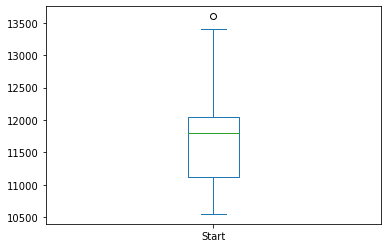

In [43]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind='box')
df4=df.sort_values(by=['Start'])
Q1=df4.Start.quantile(.25)
Q3=df4.Start.quantile(.75)
iQR = Q3 - Q1
lw=Q1-1.5*IQR
uw=Q3+1.5*IQR
print(lw)
print(uw)
print(df4.Start)
# df4.Start.loc[df4.Start>uw | df4.Start<lw]
print(df4.Start.loc[df4.Start>uw])
print(df4.Start.loc[df4.Start<lw])